# MEU PRIMEIRO PROJETO DE DATA SCIENCE 

Êêêêêêêêêê é chegada a hora de meu primeiro projeto de Data Science começar a sair do papel e ir para a tela! Irei com calma, e esperançosamente num ritmo bom, para que um dia se tenha uma giga visualização do quão decentes são os professores do IF-UFG (e quiçá da UFG algum dia!).

In [1]:
###Importar bibliotecas e pá
#Numpy né rapaz
import numpy as np
#Pandoso também
import pandas as pd
#Isso aí é pra dar pra abrir os arquivos que estão na pasta "data", e possuem as notas
import os
#Sei lá pra que são esses
import collections
import operator
#Matplotlib pros gráficosos
import matplotlib.pyplot as plt
#Isso aqui é pra supostamente fazer gráficos melhores e mais interativos no Matplotlib,
#dada a quantidade de professores que acabam aparecendo nos gráficos e fica é uma bagunça
import mpld3
#Isso é para os gráficos aparecerem aqui dentro do Jupyter
%matplotlib inline

#Criar os dataframes de todos os anos
lista_de_df = []
caminho_para_os_dados = str(os.getcwd() + '/data')
dados = os.listdir(caminho_para_os_dados)
dados.sort()
for arquivo in range(len(dados)):
    lista_de_df.append(pd.read_table(caminho_para_os_dados + '/' + dados[arquivo]))
    coluna_de_ano = np.empty(len(lista_de_df[arquivo]))
    coluna_de_ano.fill(dados[arquivo][0:4])
    coluna_de_ano = list(map(int,coluna_de_ano))
    lista_de_df[arquivo]['Ano'] = coluna_de_ano

In [2]:
#Reajustar os índices e remover as colunas usadas na adaptação
for indice_df in range(len(lista_de_df)): lista_de_df[indice_df] = lista_de_df[indice_df].set_index([lista_de_df[indice_df]['Docente '], lista_de_df[indice_df]['Componente Curricular ']]).drop(labels = ['Docente ', 'Componente Curricular '], axis = 1)

In [3]:
#Ajeitar os números de strings para floats agora
#Acho que eu poderia ter pulado esta parte mexendo nos arquivos e trocando todas as ',' por '.', mas, meh
colunas_com_numeros = ['Discentes ', 'Média Geral ', 'Desvio Padrão Geral']

for indice_df in range(len(lista_de_df)):
    for coluna in colunas_com_numeros:
        if type(lista_de_df[indice_df][coluna][[0]][0]) is str:
            i = [float(lista_de_df[indice_df][coluna][[indice]][0].replace(',','.')) for indice in range(lista_de_df[indice_df][coluna].size)]
            lista_de_df[indice_df] = lista_de_df[indice_df].drop(labels = [coluna], axis = 1)            
            lista_de_df[indice_df][coluna] = i

In [4]:
#Lista de todos os profs
lista_de_profs = []
for indice_df in range(len(lista_de_df)):
    for professor in lista_de_df[indice_df].index.get_level_values(0):
        lista_de_profs.append(professor)

#Remover duplicatas
lista_de_profs = list(set(lista_de_profs))#.sort()
#Deixar a lista em uma ordem decente
lista_de_profs.sort()

In [5]:
#Criar um dicionario contendo pares de professor e serie com suas notas
professores_e_notas = {}
for professor in lista_de_profs:
    professores_e_notas[professor] = pd.Series()

#Iterar sobre os dataframes;
    #Iterar sobre os professores que existem
        #Verificar se um professor está no dataframe atual
            #Se estiver, iterar sobre suas notas neste dataframe específico
                #Adicionar essas notas à série correspondente ao professor deste loop em sua entrada no dicionário
for indice_df in range(len(lista_de_df)):
    for professor in lista_de_profs:
        if professor in lista_de_df[indice_df].index.get_level_values(0):
            for indice in list(range(lista_de_df[indice_df].loc[[professor]]["Média Geral "].size)):
                professores_e_notas[professor] = professores_e_notas[professor].append(pd.Series( data = lista_de_df[indice_df].loc[[professor]]["Média Geral "][[indice]][0], index = [lista_de_df[indice_df].loc[[professor]]["Ano"][[indice]][0]]))

In [6]:
#Limpar o dicionario, fazendo com que só exista uma entrada por ano, que é a média de todas as notas desse ano

professores_e_notas_neue = {}
for professor in lista_de_profs:
    professores_e_notas_neue[professor] = pd.Series()

#Iterar sobre os dataframes;
    #Iterar sobre os professores que existem;
        #Verificar se um professor está no dataframe atual;
            #Se está, iterar sobre os anos (sem repetição dos anos);
            #E em seguida remover os anos duplicados da série
for indice_df in range(len(lista_de_df)):
    for professor in lista_de_profs:
        if professor in lista_de_df[indice_df].index.get_level_values(0):
            for ano in list(set(professores_e_notas[professor].index)):
                professores_e_notas_neue[professor] = professores_e_notas_neue[professor].append(pd.Series( data = professores_e_notas[professor][ano].mean(), index = [ano]))
            professores_e_notas_neue[professor] = professores_e_notas_neue[professor].drop_duplicates()

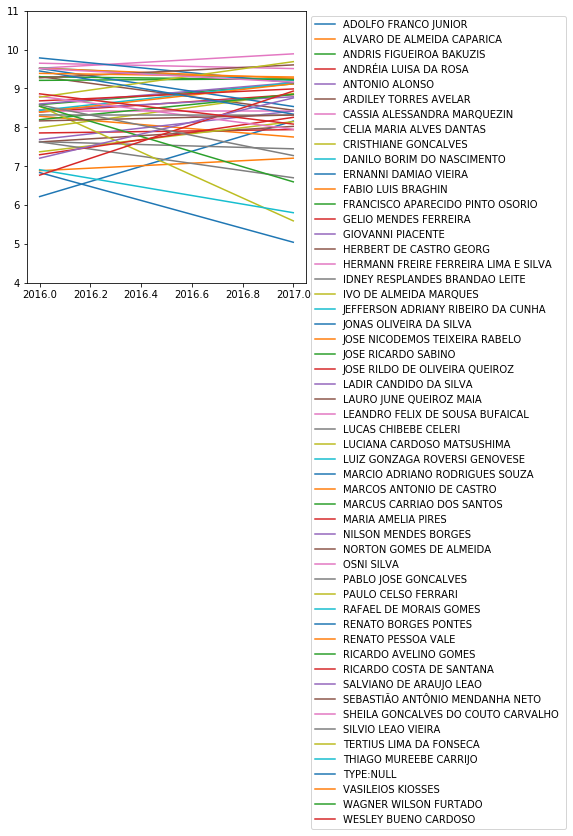

In [8]:
#Isso aqui eu comento depois
#Eu bem que podia aprender a mexer no matplotlib e no mpld3...

# plots = []
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for professor in professores_e_notas_neue:
#     plots.append(plt.plot( professores_e_notas_neue[professor], label=str(professor) ))
    professores_e_notas_neue[professor].plot(legend=True,label=professor,figsize = (5,5))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
#     plt.legend(handles=[professor])

# for grafico in plots:
#     plt.legend(handles=[grafico], loc=4)

plt.ylim(4, 11)
# plt.figure(figsize = (2000,2000), dpi = 200)

# plt.legend(handles=[line2], loc=4)
# plt.legend(bbox_to_anchor=(1, 1), loc=3, ncol=2, mode="expand", borderaxespad=0.)
# plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
# plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

# handles, labels = ax.get_legend_handles_labels() # return lines and labels
# interactive_legend = mpld3.plugins.InteractiveLegendPlugin(zip(handles,
#                                                          ax.collections),
#                                                      labels,
#                                                      alpha_unsel=0.5,
#                                                      alpha_over=1.5, 
#                                                      start_visible=True)
# mpld3.plugins.connect(fig, interactive_legend)

# mpld3.enable_notebook()
# mpld3.display()

# E acaboooooou
Pois é, acho que aqui acaba meu primeiro projeto, cujo objetivo era conseguir fazer uns DF legais e um plot bem simples (tá certo que ficou uma bagunça, mas é um começo pelo menos). Agora, rumo ao próximo projeto!

Ps.: Melhor eu ajeitar isso aqui e upar pro GitHub depois!